AVCAD - Exercise 10

Students: Maria Dolgaya (28168) and Mariana Coelho (25605)

Using the dataset in EFIplus_medit.zip:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('EFIplus_medit.zip',compression='zip', sep=";")
df = df.dropna()
df

,Site_code,Latitude,Longitude,Country,Catchment_name,Galiza,Subsample,Calib_EFI_Medit,Calib_connect,Calib_hydrol,...,Squalius malacitanus,Squalius pyrenaicus,Squalius torgalensis,Thymallus thymallus,Tinca tinca,Zingel asper,Squalius sp,Barbatula sp,Phoxinus sp,Iberochondrostoma_sp
18,ES_03_0001,41.957268,-2.926857,Spain,Douro,0,1,1,1,1,...,0,0,0,0,0,0,1,0,0,0
19,ES_03_0002,41.850818,-2.591150,Spain,Douro,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
28,ES_03_0012,41.498026,-5.528753,Spain,Douro,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
32,ES_03_0016,41.586853,-3.072064,Spain,Douro,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
43,ES_03_0029,41.830177,-3.782420,Spain,Douro,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5006,PTVO60,40.641612,-8.325149,Portugal,Vouga,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5007,PTVO61,40.729015,-8.098851,Portugal,Vouga,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5008,PTVO62,40.727959,-8.107344,Portugal,Vouga,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5009,PTVO63,40.817783,-8.224903,Portugal,Vouga,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df_douro_tejo = df[df['Catchment_name'].isin(['Douro', 'Tejo'])]
df_douro_tejo

,Site_code,Latitude,Longitude,Country,Catchment_name,Galiza,Subsample,Calib_EFI_Medit,Calib_connect,Calib_hydrol,...,Squalius malacitanus,Squalius pyrenaicus,Squalius torgalensis,Thymallus thymallus,Tinca tinca,Zingel asper,Squalius sp,Barbatula sp,Phoxinus sp,Iberochondrostoma_sp
18,ES_03_0001,41.957268,-2.926857,Spain,Douro,0,1,1,1,1,...,0,0,0,0,0,0,1,0,0,0
19,ES_03_0002,41.850818,-2.591150,Spain,Douro,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
28,ES_03_0012,41.498026,-5.528753,Spain,Douro,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
32,ES_03_0016,41.586853,-3.072064,Spain,Douro,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
43,ES_03_0029,41.830177,-3.782420,Spain,Douro,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4947,PTTA264,39.477852,-8.002427,Portugal,Tejo,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4948,PTTA265,39.477021,-8.106303,Portugal,Tejo,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4949,PTTA266,39.475082,-8.334351,Portugal,Tejo,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4950,PTTA267,39.453694,-8.432669,Portugal,Tejo,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
continuous_variables = ['Altitude', 'Actual_river_slope', 'Elevation_mean_catch', 'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul']
df_continuous = df_douro_tejo[continuous_variables]
df_continuous

,Altitude,Actual_river_slope,Elevation_mean_catch,prec_ann_catch,temp_ann,temp_jan,temp_jul
18,1179,0.001,1687.103217,810.092422,9.3,1.4,18.4
19,1038,2.258,1293.238318,650.030528,10.4,2.2,19.6
28,636,0.263,967.398405,513.949149,12.6,3.8,21.3
32,890,2.909,1088.329483,553.756064,11.2,2.7,20.5
43,872,3.530,985.273741,518.863081,11.1,2.6,20.0
...,...,...,...,...,...,...,...
4947,38,0.100,704.675069,515.039678,17.1,10.3,23.8
4948,26,0.100,702.673201,516.097287,17.1,10.4,23.6
4949,20,0.100,697.730192,518.386401,16.7,10.8,22.9
4950,13,0.100,679.784324,556.028518,16.7,10.9,22.7


1. Run a PCA based on quantitative environmental variables (see previous exercise), using sites from the
Douro and Tejo basins. Produce a biplot with ‘Catchment_name’ as a grouping variable.

Data standardization

In [5]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

df_continuous_scaled = StandardScaler().fit_transform(df_continuous)
df_scaled = pd.DataFrame(data=df_continuous_scaled, 
                         columns=df_continuous.columns)
df_scaled.head()


,Altitude,Actual_river_slope,Elevation_mean_catch,prec_ann_catch,temp_ann,temp_jan,temp_jul
0,3.002541,-0.635303,3.274284,-0.591536,-2.756492,-2.389199,-2.215321
1,2.481245,-0.500834,2.020549,-1.235061,-2.159600,-2.055191,-1.463074
2,0.994996,-0.619693,0.983347,-1.782173,-0.965816,-1.387173,-0.397390
3,1.934069,-0.462048,1.368290,-1.622130,-1.725497,-1.846435,-0.898889
4,1.867521,-0.425049,1.040247,-1.762416,-1.779760,-1.888186,-1.212325


We are now ready to run PCA.

Select the number of Principal Components (PC)

First we run PCA for 8 components (number of original variables).

In [6]:
pca = PCA(n_components=7)
pca.fit_transform(df_scaled)

array([[ 5.57787293, -2.55575821, -0.21699638, ...,  0.29548608,
         0.82484278,  0.06373648],
       [ 4.00205848, -2.51503778,  0.33580977, ..., -0.14187326,
         0.29455841, -0.00711034],
       [ 1.53421336, -2.31488304,  0.61931889, ...,  0.20463529,
        -0.19603614, -0.14903837],
       ...,
       [-2.4931115 , -0.87391481,  0.4900484 , ...,  1.10794224,
         0.90837718,  0.08674624],
       [-2.4654649 , -0.72209753,  0.36118852, ...,  1.08878938,
         0.91759771,  0.07645519],
       [-2.48628059, -0.69043921,  0.34202741, ...,  1.09765213,
         0.97148689,  0.03517776]])

We have run the PCA and now we can extract the proportion of explained variance and the eigenvalues as follows:

In [7]:
eigenvalues = pca.explained_variance_ # eigenvalues
prop_var = pca.explained_variance_ratio_ # proportion of explained variance

Plot the scree plot with proportion of variance

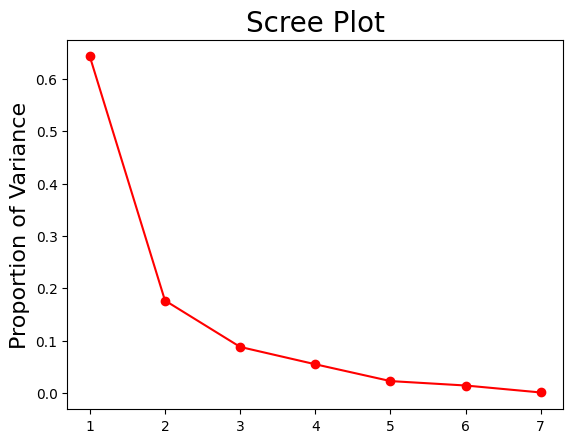

In [8]:
PC_numbers = np.arange(pca.n_components_) + 1
 
plt.plot(PC_numbers, 
         prop_var,
         'ro-')
plt.title('Scree Plot', fontsize=20)
plt.ylabel('Proportion of Variance', fontsize=16)
plt.show()

Visualize and interpret the PCA biplot

In [9]:
pca = PCA(n_components=2)
PC = pca.fit_transform(df_scaled)

In [10]:
pca_continuous = pd.DataFrame(data = PC, 
                            columns = ['PC1', 'PC2'])
pca_continuous.head(6)

,PC1,PC2
0,5.577873,-2.555758
1,4.002058,-2.515038
2,1.534213,-2.314883
3,2.908218,-2.498679
4,2.881538,-2.430876
5,1.720899,-2.396624


In [11]:
# "score" - Scores of each object (for each PC) - PC
# "coef" - PCA variable loadings (for each PC) - pca.components_
# labels - name of variables - list(df.columns)


def biplot(score,coef,labels=None): 
 
    xs = score[:,0] # PC1 object scores
    ys = score[:,1] # PC2 object scores 
    n = coef.shape[0] # number of dimensions (2)
    scalex = 1.0/(xs.max() - xs.min()) # to rescale scores
    scaley = 1.0/(ys.max() - ys.min()) # to rescale scores
    plt.scatter(xs * scalex,ys * scaley,
                s=6, 
                color='blue') # scatter plot using rescaled object scores
 
    for i in range(n):
        plt.arrow(0, 0, coef[i,0], 
                  coef[i,1],color = 'red',
                  head_width=0.01,
                  alpha = 0.5) # plot arrows for each variable
        plt.text(coef[i,0]* 1.15, 
                 coef[i,1] * 1.15, 
                 labels[i], 
                 color = 'red', 
                 ha = 'center', 
                 va = 'center') # variable labels for each arrow
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))    
 
 
    plt.figure()

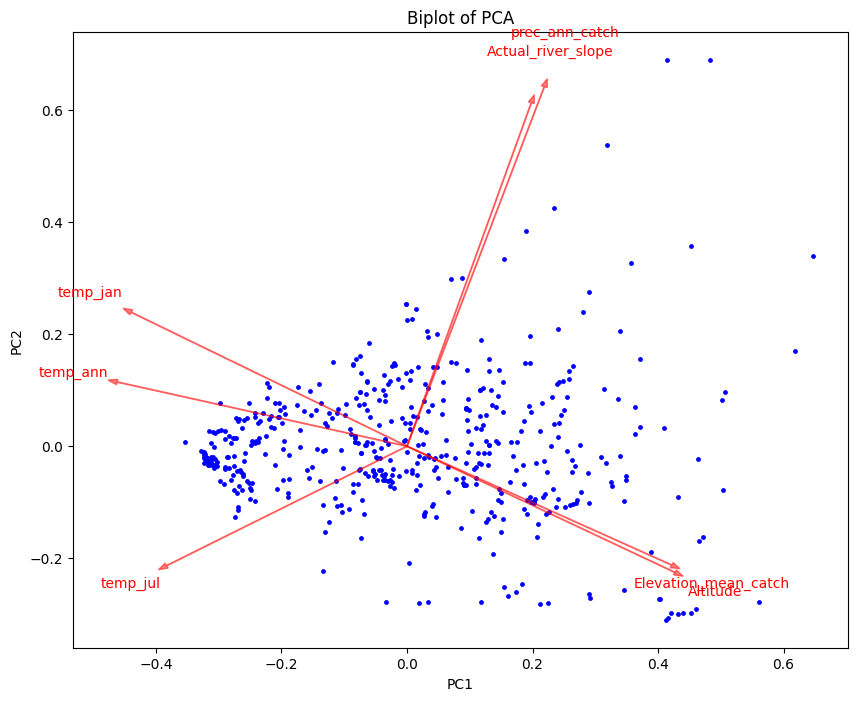

<Figure size 640x480 with 0 Axes>

In [12]:
plt.figure(figsize=(10, 8))
plt.title('Biplot of PCA')
 
biplot(PC, 
       np.transpose(pca.components_), 
       list(df_continuous.columns))
plt.show()

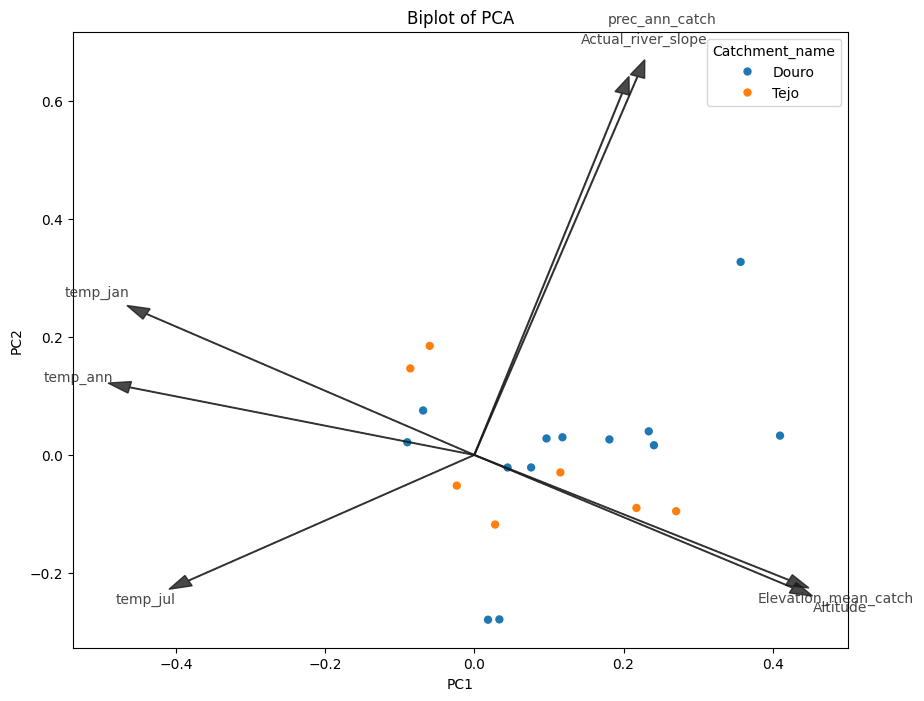

In [13]:
# a biplot with ‘Catchment_name’ as a grouping variable

PC1 = pca_continuous['PC1']/(pca_continuous['PC1'].max() - pca_continuous['PC1'].min())
PC2 = pca_continuous['PC2']/(pca_continuous['PC2'].max() - pca_continuous['PC2'].min())

plt.figure(figsize=(10, 8))
plt.title('Biplot of PCA')
sns.scatterplot(x=PC1,
              y=PC2,
              hue = df_douro_tejo['Catchment_name'],
              linewidth=0,
              )

n = np.transpose(pca.components_).shape[0] # number of dimensions (2)
for i in range(n):
        plt.arrow(0, 0, np.transpose(pca.components_)[i,0], 
                  np.transpose(pca.components_)[i,1], 
                  color = (0.1, 0.1, 0.1, 0.8),
                  head_width=0.02) # plot arrows for each variable
        plt.text(np.transpose(pca.components_)[i,0]* 1.15, 
                 np.transpose(pca.components_)[i,1] * 1.15, 
                 list(df_continuous.columns)[i], 
                 color = (0.1, 0.1, 0.1, 0.8), 
                 ha = 'center', 
                 va = 'center') # variable labels for each arrow
plt.legend(title='Catchment_name')
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))

plt.show()

2. Using the same data, run a PCoA and project the sites using the resulting first two axis. Use also the
‘Catchment_name’ as a grouping variable.

In [14]:
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import manhattan_distances, euclidean_distances
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

Run PCoA

In [15]:
# by default the 'mds' argument is set to 'True', which means it will run a MDS
# Euclidean distances are also the default 
# Only two axis are extracted by default
mds = MDS(random_state=0, normalized_stress = False) 
mds_transf = mds.fit_transform(df_scaled)

Plot the result

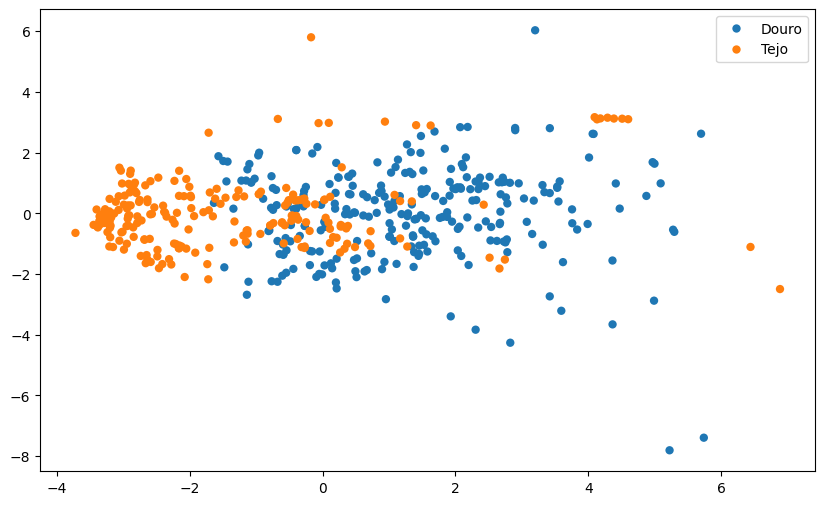

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=mds_transf[:,0],
              y=mds_transf[:,1],
              hue = df_douro_tejo['Catchment_name'].tolist(),
              linewidth=0,
              )
plt.show()

In [17]:
# compute MDS
dist_manhattan = manhattan_distances(df_scaled)
mds = MDS(dissimilarity='precomputed', random_state=0, normalized_stress = False)
mds_transf2 = mds.fit_transform(dist_manhattan)

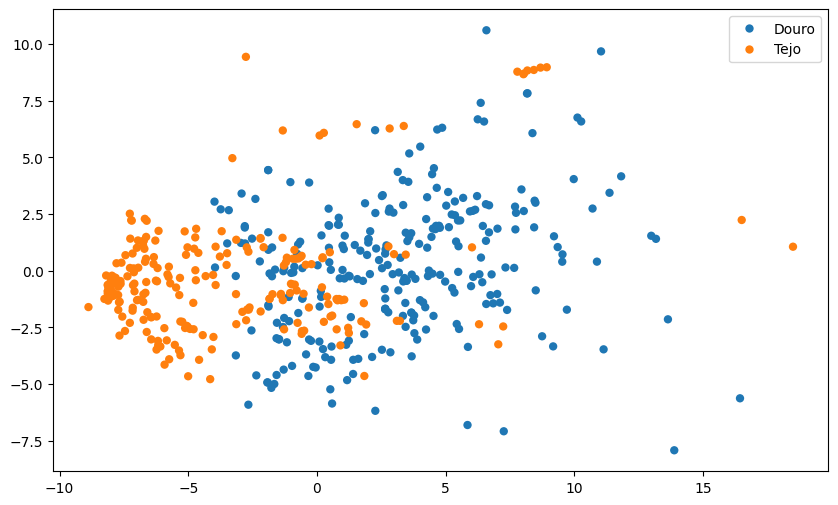

In [18]:
# plot the result in 2D

plt.figure(figsize=(10, 6))
sns.scatterplot(x=mds_transf2[:,0],
              y=mds_transf2[:,1],
              hue = df_douro_tejo['Catchment_name'].tolist(),
              linewidth=0,
              )
plt.show()

3. Run a Linear Discriminant Analysis based on quantitative environmental variables (see previous
exercises), using the Douro and Tejo basins as the pre-determined groups. Produce a biplot with
‘Catchment_name’ as a grouping variable.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

Define predictor and response variables

In [20]:
X = df_scaled
y = df_douro_tejo['Catchment_name'] # 2 catchments

#Fit the LDA model (we set to two components)
model = LinearDiscriminantAnalysis(n_components=1)
LDA = model.fit_transform(X, y)

Extract the first discriminant axis to a DataFrame

In [24]:
LDA_scores = pd.DataFrame(data=LDA, columns=['LD1'])
LDA_scores['Catchment_name'] = y.values
LDA_scores['temp_ann'] = df_douro_tejo['temp_ann']
LDA_scores.head(6)

,LD1,Catchment_name,temp_ann
0,-1.196125,Douro,NaN
1,-1.026793,Douro,NaN
2,-1.369078,Douro,NaN
3,-1.336983,Douro,NaN
4,-1.865375,Douro,NaN
5,-0.972792,Douro,NaN


Define method to evaluate model

In [25]:
#defines the kfold crossvalidation settings for the next function 'cross_val_score'
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) 

#evaluate model (classification accuracy - from 0 to 1)
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores))

0.9527189542483662


Plot the fist discriminant plane

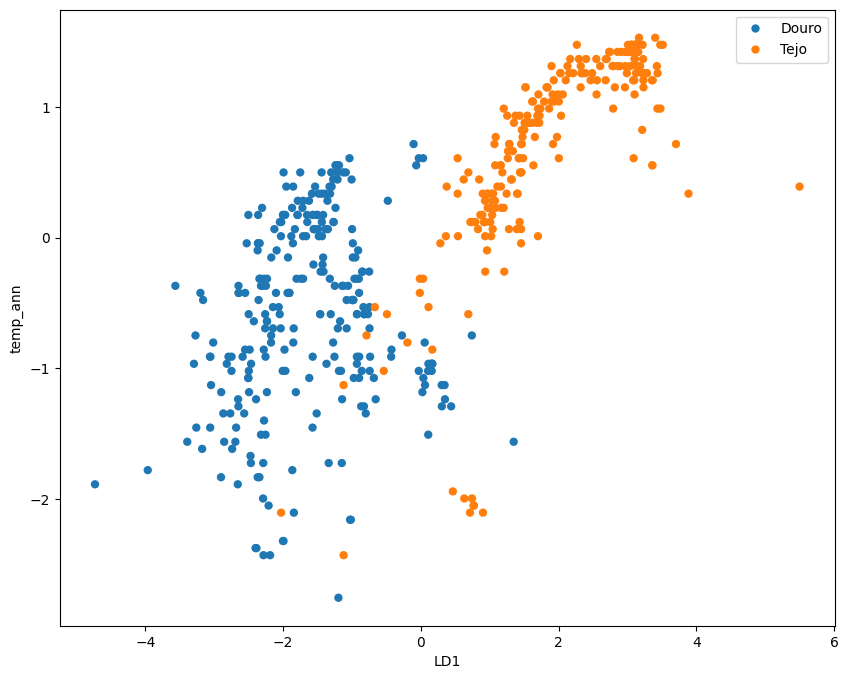

In [26]:
plt.figure(figsize=(10, 8))

sns.scatterplot(x=LDA_scores['LD1'],
              y=df_scaled['temp_ann'],
              hue = df_douro_tejo['Catchment_name'].tolist(),
              linewidth=0,
              )
plt.show()

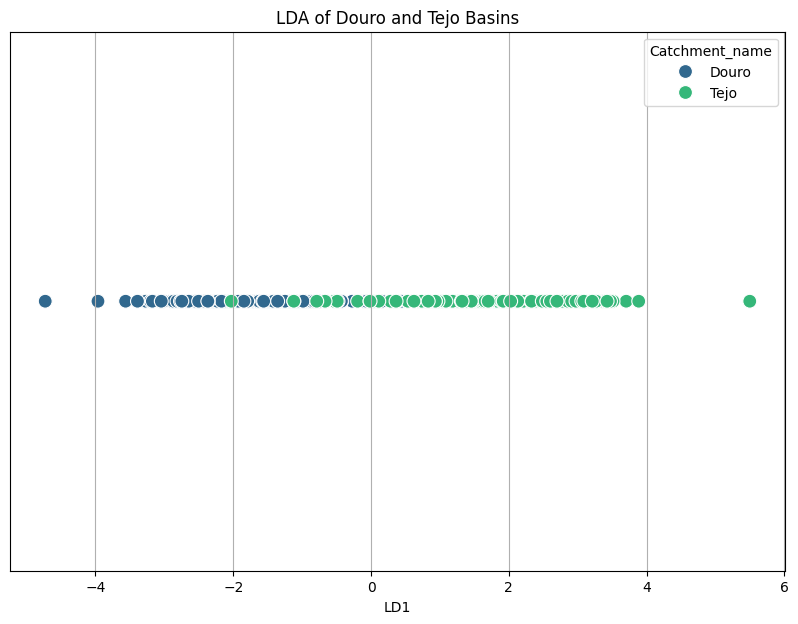

In [27]:
X = df_scaled
y = df_douro_tejo['Catchment_name']

# Fit the LDA model (we only need one component since we have two classes)
model = LinearDiscriminantAnalysis(n_components=1)
LDA = model.fit_transform(X, y)

# Create a DataFrame for the single linear discriminant
LDA_scores = pd.DataFrame(data=LDA, columns=['LD1'])
LDA_scores['Catchment_name'] = y.values

# Visualize the LDA result
plt.figure(figsize=(10, 7))
sns.scatterplot(x='LD1', y=[0] * len(LDA_scores), hue='Catchment_name', data=LDA_scores, palette='viridis', s=100)
plt.title('LDA of Douro and Tejo Basins')
plt.xlabel('LD1')
plt.yticks([])
plt.grid()
plt.show()